In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [2]:
df_customer = pd.read_csv("../data/temp3/output/customer_processed.csv")
df_trans = pd.read_csv("../data/temp3/output/trans_processed.csv")
df_product = pd.read_csv("../data/temp3/output/product_processed.csv")
df_merge = pd.read_csv("../data/temp3/output/merge.csv")
df_daily_sales = pd.read_csv("../data/temp3/output/daily_sales.csv")
df_daily_sales_detail = pd.read_csv("../data/temp3/output/daily_sales_detail.csv")
df_daily_registration = pd.read_csv("../data/temp3/output/daily_registration.csv")
df_daily_registration_detail = pd.read_csv("../data/temp3/output/daily_registration_detail.csv")

# Convert Object to Date

In [3]:
df_customer.info()
df_trans.info()
df_product.info()
df_merge.info()
df_daily_sales.info()
df_daily_sales_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customer_id             5000 non-null   object
 1   customer_name           5000 non-null   object
 2   registration_date       5000 non-null   object
 3   customer_name_kana      5000 non-null   object
 4   email                   5000 non-null   object
 5   gender                  5000 non-null   object
 6   age                     5000 non-null   int64 
 7   birth                   5000 non-null   object
 8   pref                    5000 non-null   object
 9   registration_date_time  5000 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7144 entries, 0 to 7143
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  71

In [4]:
df_customer['registration_date'] = pd.to_datetime(df_customer['registration_date'], format='%Y-%m-%d')
df_customer['registration_date_time'] = pd.to_datetime(df_customer['registration_date_time'], format='%Y-%m-%d')
df_customer['birth'] = pd.to_datetime(df_customer['birth'], format='%Y-%m-%d')

df_trans['payment_date'] = pd.to_datetime(df_trans['payment_date'], format='%Y-%m-%d')

df_merge['registration_date'] = pd.to_datetime(df_merge['registration_date'], format='%Y-%m-%d')
df_merge['birth'] = pd.to_datetime(df_merge['birth'], format='%Y-%m-%d')
df_merge['payment_date_time'] = pd.to_datetime(df_merge['payment_date_time'], format='%Y-%m-%d')
df_merge['payment_date'] = pd.to_datetime(df_merge['payment_date'], format='%Y-%m-%d')
df_merge['registration_date'] = pd.to_datetime(df_merge['registration_date'], format='%Y-%m-%d')
df_merge['registration_date_time'] = pd.to_datetime(df_merge['registration_date_time'], format='%Y-%m-%d')

df_daily_sales['payment_date'] = pd.to_datetime(df_daily_sales['payment_date'], format='%Y-%m-%d')
df_daily_sales_detail['payment_date'] = pd.to_datetime(df_daily_sales_detail['payment_date'], format='%Y-%m-%d')
df_daily_registration['registration_date'] = pd.to_datetime(df_daily_registration['registration_date'], format='%Y-%m-%d')
df_daily_registration_detail['registration_date'] = pd.to_datetime(df_daily_registration_detail['registration_date'], format='%Y-%m-%d')

# Data Visualization

In [5]:
df_merge["payment_date"] = pd.to_datetime(df_merge['payment_date'])
df_merge["payment_month"] = df_merge["payment_date"].dt.strftime('%Y%m')
df_merge[["payment_date","price", "payment_month"]].head(5)

,payment_date,price,payment_month
0,2019-02-01,210000,201902
1,2019-02-01,50000,201902
2,2019-02-01,120000,201902
3,2019-02-01,210000,201902
4,2019-02-01,170000,201902


In [6]:
df_merge.groupby("payment_month").sum()["price"]

payment_month
201902    179190000
201903    175375000
201904    176720000
201905    171385000
201906    183395000
201907    188685000
Name: price, dtype: int64

In [7]:
print(df_merge["price"].sum())
print(df_trans["price"].sum())

1074750000
1074750000


In [8]:
df_merge["payment_date"] = pd.to_datetime(df_merge['payment_date'])
df_merge['payment_month'] = df_merge['payment_date'].dt.strftime("%Y%m")
df_merge[['payment_date','price','payment_month']].head()

,payment_date,price,payment_month
0,2019-02-01,210000,201902
1,2019-02-01,50000,201902
2,2019-02-01,120000,201902
3,2019-02-01,210000,201902
4,2019-02-01,170000,201902


In [9]:
df_merge.groupby(["payment_month","item_name"]).sum()[["price", "quantity"]]

price  quantity
payment_month item_name                    
201902        PC-A       29270000       483
              PC-B       27785000       297
              PC-C       22905000       165
              PC-D       35010000       173
              PC-E       64220000       285
201903        PC-A       30440000       520
              PC-B       28540000       300
              PC-C       20275000       159
              PC-D       27205000       143
              PC-E       68915000       305
201904        PC-A       31600000       518
              PC-B       26850000       276
              PC-C       23665000       183
              PC-D       26045000       135
              PC-E       68560000       309
201905        PC-A       29575000       497
              PC-B       28660000       298
              PC-C       21885000       171
              PC-D       27485000       144
              PC-E       63780000       280
201906        PC-A       30650000       520
              PC-B       28020000       282
              PC-C       24865000       182
              PC-D       32550000       160
              PC-E       67310000       302
201907        PC-A       30225000       505
              PC-B       31350000       332
              PC-C       21715000       162
              PC-D       28170000       145
              PC-E       77225000       341

In [10]:
pd.pivot_table(df_merge, index='item_name', columns='payment_month', values=['price','quantity'],aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           29270000  30440000  31600000  29575000  30650000  30225000   
PC-B           27785000  28540000  26850000  28660000  28020000  31350000   
PC-C           22905000  20275000  23665000  21885000  24865000  21715000   
PC-D           35010000  27205000  26045000  27485000  32550000  28170000   
PC-E           64220000  68915000  68560000  63780000  67310000  77225000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

In [18]:
graph_data = pd.pivot_table(df_merge, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,29270000,27785000,22905000,35010000,64220000
201903,30440000,28540000,20275000,27205000,68915000
201904,31600000,26850000,23665000,26045000,68560000
201905,29575000,28660000,21885000,27485000,63780000
201906,30650000,28020000,24865000,32550000,67310000


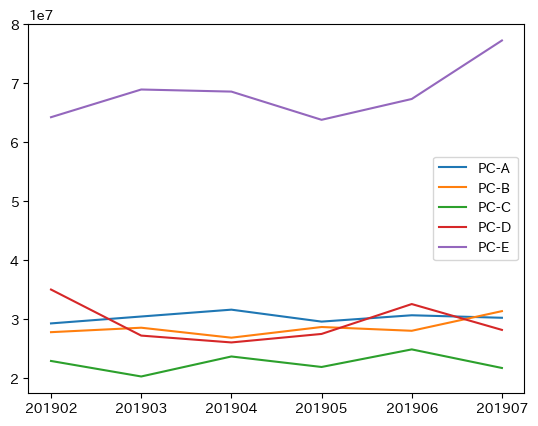

In [22]:
import matplotlib.pyplot as ptl
%matplotlib inline
plt.plot(list(graph_data.index),graph_data['PC-A'], label='PC-A')
plt.plot(list(graph_data.index),graph_data['PC-B'], label='PC-B')
plt.plot(list(graph_data.index),graph_data['PC-C'], label='PC-C')
plt.plot(list(graph_data.index),graph_data['PC-D'], label='PC-D')
plt.plot(list(graph_data.index),graph_data['PC-E'], label='PC-E')

plt.legend()